In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:/Users/geeze/Documents/finances/ins_n_outs.xlsx')

In [3]:
df

,month,year,rent,utilsCurt,utilsFair,income,cc spend,venmo,reimburse,misc corrections,note
0,8,2013,0.0,49.500000,NaN,2000.00,NaN,NaN,NaN,NaN,NaN
1,9,2013,0.0,53.000000,NaN,2000.00,NaN,NaN,NaN,NaN,NaN
2,10,2013,0.0,23.500000,NaN,2000.00,NaN,NaN,NaN,NaN,NaN
3,11,2013,0.0,24.500000,NaN,2000.00,NaN,NaN,NaN,NaN,NaN
4,12,2013,0.0,25.500000,NaN,2000.00,4.79,NaN,NaN,NaN,NaN
5,1,2014,0.0,25.000000,NaN,2000.00,259.39,NaN,NaN,NaN,NaN
6,2,2014,0.0,29.000000,NaN,2000.00,343.67,NaN,NaN,NaN,NaN
7,3,2014,0.0,29.415000,NaN,2000.00,237.71,NaN,NaN,NaN,NaN
8,4,2014,0.0,11.761667,NaN,2000.00,288.67,NaN,NaN,NaN,NaN
9,5,2014,0.0,35.996667,NaN,2000.00,182.03,NaN,NaN,NaN,NaN


In [4]:
df = df.fillna(value=0)

In [5]:
def plus_minus (df):
    
    ins = df['income'] + df['reimburse'] + df['misc corrections']
    
    outs = df['venmo'] - df['utilsCurt'] - df['utilsFair'] - df['cc spend'] - df['rent']
    
    req_out = df['rent'] + df['utilsCurt'] + df['utilsFair']
    
    disc_out = -(df['venmo'] - df['cc spend']) #this assumes that venmo will always be less than credit card spending
    
    net = ins + outs
    
    return net, req_out, disc_out, ins

In [6]:
df['unspent'], df['req spend'], df['disc spend'], df['total ins']= plus_minus(df)

In [7]:
df

,month,year,rent,utilsCurt,utilsFair,income,cc spend,venmo,reimburse,misc corrections,note,unspent,req spend,disc spend,total ins
0,8,2013,0.0,49.500000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1950.500000,49.500000,-0.00,2000.00
1,9,2013,0.0,53.000000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1947.000000,53.000000,-0.00,2000.00
2,10,2013,0.0,23.500000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1976.500000,23.500000,-0.00,2000.00
3,11,2013,0.0,24.500000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1975.500000,24.500000,-0.00,2000.00
4,12,2013,0.0,25.500000,0.0000,2000.00,4.79,0.00,0.00,0.00,0,1969.710000,25.500000,4.79,2000.00
5,1,2014,0.0,25.000000,0.0000,2000.00,259.39,0.00,0.00,0.00,0,1715.610000,25.000000,259.39,2000.00
6,2,2014,0.0,29.000000,0.0000,2000.00,343.67,0.00,0.00,0.00,0,1627.330000,29.000000,343.67,2000.00
7,3,2014,0.0,29.415000,0.0000,2000.00,237.71,0.00,0.00,0.00,0,1732.875000,29.415000,237.71,2000.00
8,4,2014,0.0,11.761667,0.0000,2000.00,288.67,0.00,0.00,0.00,0,1699.568333,11.761667,288.67,2000.00
9,5,2014,0.0,35.996667,0.0000,2000.00,182.03,0.00,0.00,0.00,0,1781.973333,35.996667,182.03,2000.00


In [8]:
def make_dtime (df):

    date_info = df.loc[:, ['month', 'year']]
    
    date_info['day'] = 1
        
    date = pd.to_datetime(date_info)
    
    return date

In [9]:
df['date'] = make_dtime(df)

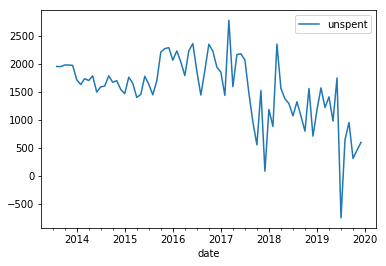

In [10]:
### absolute unspent money
df.plot(x='date', y='unspent')

In [11]:
### total saved cash over whole time

df['unspent'].sum()

119274.05833333005

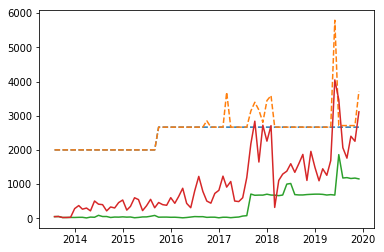

In [12]:
### ABSOLUTE SPENDING VS INFLOW

#put income on there
plt.plot(df['date'], df['income'], '--')

#put income plus other sources of money that month on there
plt.plot(df['date'], df['total ins'], '--')

#now add required spending
plt.plot(df['date'], df['req spend'])

#now add discretionary spending above required.
plt.plot(df['date'], df['req spend']+df['disc spend'])

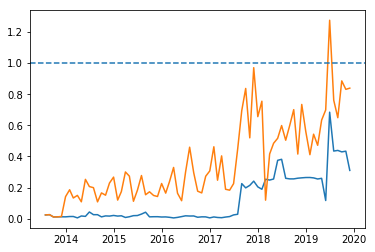

In [13]:
### SPENDING AS PERCENT OF INFLOW

#required spending as percentage of total inflow
plt.plot(df['date'], df['req spend'] / df['total ins'])

#now add discretionary spending above required as percentage of total inflow
plt.plot(df['date'], (df['req spend']+df['disc spend']) / df['total ins'])

plt.axhline(1, linestyle = '--')

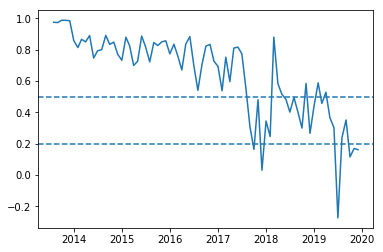

In [14]:
### PERCENT OF INFLOW SAVED

plt.plot(df['date'], df['unspent'] / df['total ins'])

plt.axhline(0.2, linestyle='--')
plt.axhline(0.5, linestyle='--')

In [228]:
### MEAN SAVINGS BEFORE AND AFTER A CERTAIN DATE, PERCENT OF INFLOW

d = datetime.datetime(2019, 8, 1)

(df.loc[(df['date'] >= d), 'unspent'] / df.loc[(df['date'] >= d), 'total ins']).mean()

0.3740551912850439

In [231]:
### absolute savings before or after a certain date
d = datetime.datetime(2017, 1, 1)

df.loc[~(df['date'] >= d), 'unspent'].sum()

75164.61833332